In [1]:
#!pip install skranger
!pip install xgboost
!pip install pyspark
!pip install plotly
!pip install folium
from xgboost import XGBClassifier
import sys
import folium
import json
import requests
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rt
import pyspark
import pandas as pd
from plotly import graph_objects as go
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
datatrain_muestra_500=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_500.csv', header=0)
datatrain_muestra_300=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_300.csv', header=0)
datatrain_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_200.csv', header=0)
datatrain_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_100.csv', header=0)

dataval_muestra_250=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_250.csv', header=0)
dataval_muestra_150=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_150.csv', header=0)
dataval_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_100.csv', header=0)
dataval_muestra_50=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_50.csv', header=0)

datatest_muestra_210=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_210.csv', header=0)
datatest_muestra_120=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_120.csv', header=0)
datatest_muestra_90=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_90.csv', header=0)
datatest_muestra_32=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_32.csv', header=0)

In [3]:
X_cols = ['merchant','amt','zip',
          'job','Hora','Edad', 'category_food_dining', 
          'category_gas_transport','category_grocery_net','category_grocery_pos',
          'category_health_fitness','category_home','category_kids_pets','category_misc_net',
          'category_misc_pos','category_personal_care','category_shopping_net','category_shopping_pos',
          'category_travel','gender_M','week_Monday','week_Saturday','week_Sunday','week_Thursday',
          'week_Tuesday','week_Wednesday', 'dist', 'hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_trans_amt_avg_60d']

Y_cols = ['is_fraud']

In [4]:
X_train_500 = datatrain_muestra_500[X_cols]
y_train_500 = datatrain_muestra_500[Y_cols]
X_val_250 = dataval_muestra_250[X_cols]
y_val_250 = dataval_muestra_250[Y_cols]
X_test_210 = datatest_muestra_210[X_cols]
y_test_210 = datatest_muestra_210[Y_cols]

In [5]:
X_train_300 = datatrain_muestra_300[X_cols]
y_train_300 = datatrain_muestra_300[Y_cols]
X_val_150 = dataval_muestra_150[X_cols]
y_val_150 = dataval_muestra_150[Y_cols]
X_test_120 = datatest_muestra_120[X_cols]
y_test_120 = datatest_muestra_120[Y_cols]

In [6]:
X_train_200 = datatrain_muestra_200[X_cols]
y_train_200 = datatrain_muestra_200[Y_cols]
X_val_100 = dataval_muestra_100[X_cols]
y_val_100 = dataval_muestra_100[Y_cols]
X_test_90 = datatest_muestra_90[X_cols]
y_test_90 = datatest_muestra_90[Y_cols]

In [7]:
X_train_100 = datatrain_muestra_100[X_cols]
y_train_100 = datatrain_muestra_100[Y_cols]
X_val_50 = dataval_muestra_50[X_cols]
y_val_50 = dataval_muestra_50[Y_cols]
X_test_32 = datatest_muestra_32[X_cols]
y_test_32 = datatest_muestra_32[Y_cols]

In [8]:
import sklearn
from sklearn.utils import class_weight
def class_weights(df, class_name) :
    y = df[class_name]
    return sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(y), y)

In [9]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.activations import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.utils import class_weight
import numpy
import keras_metrics
import utils

Using TensorFlow backend.


# Fija las semillas aleatorias para la reproducibilidad
numpy.random.seed(7)


def Red_neuronal(neurons, dropout_rate, learn_rate):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=31, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    # Compile model
    adam = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=Red_neuronal)

# define the grid search parameters
batch_size = [250, 350]
epochs = [50, 150, 300]
learn_rate = [0.001, 0.01]
dropout_rate = [0.0, 0.2, 0.5]
neurons = [3, 12, 15]

param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  learn_rate=learn_rate,
                  neurons=neurons,
                  dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [10]:
# Ajusta el modelo
#Ajuste_500 = grid.fit(X_train_500, y_train_500, class_weight = class_weights(datatrain_muestra_500, 'is_fraud'), validation_data=(X_val_250,y_val_250))
#Ajuste_300 = grid.fit(X_train_300, y_train_300, class_weight = class_weights(datatrain_muestra_300, 'is_fraud'), validation_data=(X_val_150,y_val_150))
#Ajuste_200 = grid.fit(X_train_200, y_train_200, class_weight = class_weights(datatrain_muestra_200, 'is_fraud'), validation_data=(X_val_100,y_val_100))
#Ajuste_100 = grid.fit(X_train_100, y_train_100, class_weight = class_weights(datatrain_muestra_100, 'is_fraud'), validation_data=(X_val_50,y_val_50))

In [11]:
#print("Best: %f using %s" % (Ajuste_500.best_score_, Ajuste_500.best_params_))
#print("Best: %f using %s" % (Ajuste_300.best_score_, Ajuste_300.best_params_))
#print("Best: %f using %s" % (Ajuste_200.best_score_, Ajuste_200.best_params_))
#print("Best: %f using %s" % (Ajuste_100.best_score_, Ajuste_100.best_params_))

In [12]:
numpy.random.seed(7)

# crea el modelo
model = Sequential()
model.add(Dense(15, input_dim=31, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compila el modelo
adam=Adam(lr=0.001)


model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[keras_metrics.precision(), keras_metrics.recall()])

# Ajusta el modelo
history = model.fit(X_train_500, 
                    y_train_500, 
                    epochs=150, 
                    batch_size=250, 
                    class_weight = class_weights(datatrain_muestra_500, 'is_fraud'), 
                    validation_data=(X_val_250,y_val_250))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\Maximiliano\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1], y=0         0
1         0
2         1
3         0
4         1
5         0
6         1
7         0
8         1
9         0
10        0
11        0
12        0
13        0
14        1
15        0
16        0
17        0
18        1
19        0
20        0
21        0
22        1
23        0
24        0
25        1
26        0
27        0
28        0
29        0
         ..
499970    0
499971    0
499972    0
499973    0
499974    0
499975    1
499976    0
499977    0
499978    0
499979    0
499980    0
499981    0
499982    0
499983    0
499984    0
499985    0
499986    0
499987    1
499988    1
499989    0
499990    1
499991    1
499992    0
499993    0
499994    0
499995    1
499996    0
499997    0
499998    1
499999    0
Name: is_fraud, Length: 500000, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional argume

Train on 500000 samples, validate on 250000 samples
Epoch 1/150
500000/500000 [==============================] - 3s 7us/step - loss: 0.9081 - precision: 0.2350 - recall: 0.0031 - val_loss: 0.5482 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
500000/500000 [==============================] - 3s 6us/step - loss: 0.5477 - precision: 0.2167 - recall: 1.0989e-04 - val_loss: 0.5479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
500000/500000 [==============================] - 3s 6us/step - loss: 0.5471 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
500000/500000 [==============================] - 4s 7us/step - loss: 0.5471 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
500000/500000 [==============================] - 5s 10us/step - loss: 0.5470 - precision: 0.7500 - recall: 5.8324e-04 - val_loss

500000/500000 [==============================] - 4s 7us/step - loss: 0.3017 - precision: 0.9852 - recall: 0.5974 - val_loss: 0.2763 - val_precision: 0.9969 - val_recall: 0.6679
Epoch 44/150
500000/500000 [==============================] - 3s 7us/step - loss: 0.2953 - precision: 0.9863 - recall: 0.6045 - val_loss: 0.0772 - val_precision: 0.9946 - val_recall: 0.9788
Epoch 45/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.3099 - precision: 0.9858 - recall: 0.5781 - val_loss: 0.1126 - val_precision: 0.9898 - val_recall: 0.9922
Epoch 46/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.2727 - precision: 0.9859 - recall: 0.6471 - val_loss: 0.0361 - val_precision: 0.9965 - val_recall: 0.9998
Epoch 47/150
500000/500000 [==============================] - 4s 9us/step - loss: 0.2897 - precision: 0.9900 - recall: 0.6147 - val_loss: 0.1310 - val_precision: 0.9988 - val_recall: 0.8882
Epoch 48/150
500000/500000 [==============================] - 4

500000/500000 [==============================] - 4s 8us/step - loss: 0.1967 - precision: 0.9940 - recall: 0.7712 - val_loss: 0.0196 - val_precision: 0.9974 - val_recall: 0.9999
Epoch 87/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.2114 - precision: 0.9934 - recall: 0.7392 - val_loss: 0.0249 - val_precision: 0.9960 - val_recall: 0.9999
Epoch 88/150
500000/500000 [==============================] - 5s 9us/step - loss: 0.2210 - precision: 0.9927 - recall: 0.7244 - val_loss: 0.0507 - val_precision: 0.9951 - val_recall: 0.9993
Epoch 89/150
500000/500000 [==============================] - 5s 9us/step - loss: 0.2612 - precision: 0.9876 - recall: 0.6661 - val_loss: 0.3036 - val_precision: 0.9810 - val_recall: 0.6282
Epoch 90/150
500000/500000 [==============================] - 5s 11us/step - loss: 0.2666 - precision: 0.9892 - recall: 0.6568 - val_loss: 0.0942 - val_precision: 0.9969 - val_recall: 0.9998
Epoch 91/150
500000/500000 [==============================] - 

500000/500000 [==============================] - 4s 8us/step - loss: 0.2405 - precision: 0.9941 - recall: 0.6971 - val_loss: 0.0972 - val_precision: 0.9989 - val_recall: 0.9999
Epoch 130/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.1849 - precision: 0.9951 - recall: 0.7940 - val_loss: 0.0315 - val_precision: 0.9992 - val_recall: 0.9999
Epoch 131/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.1481 - precision: 0.9972 - recall: 0.8435 - val_loss: 0.0532 - val_precision: 0.9998 - val_recall: 0.9999
Epoch 132/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.2347 - precision: 0.9959 - recall: 0.7137 - val_loss: 0.0668 - val_precision: 0.9859 - val_recall: 0.9999
Epoch 133/150
500000/500000 [==============================] - 4s 8us/step - loss: 0.1417 - precision: 0.9985 - recall: 0.8550 - val_loss: 0.0264 - val_precision: 0.9979 - val_recall: 0.9999
Epoch 134/150
500000/500000 [==============================

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# calcula las predicciones
predictions = model.predict(X_test_210)

# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]
#print(rounded)

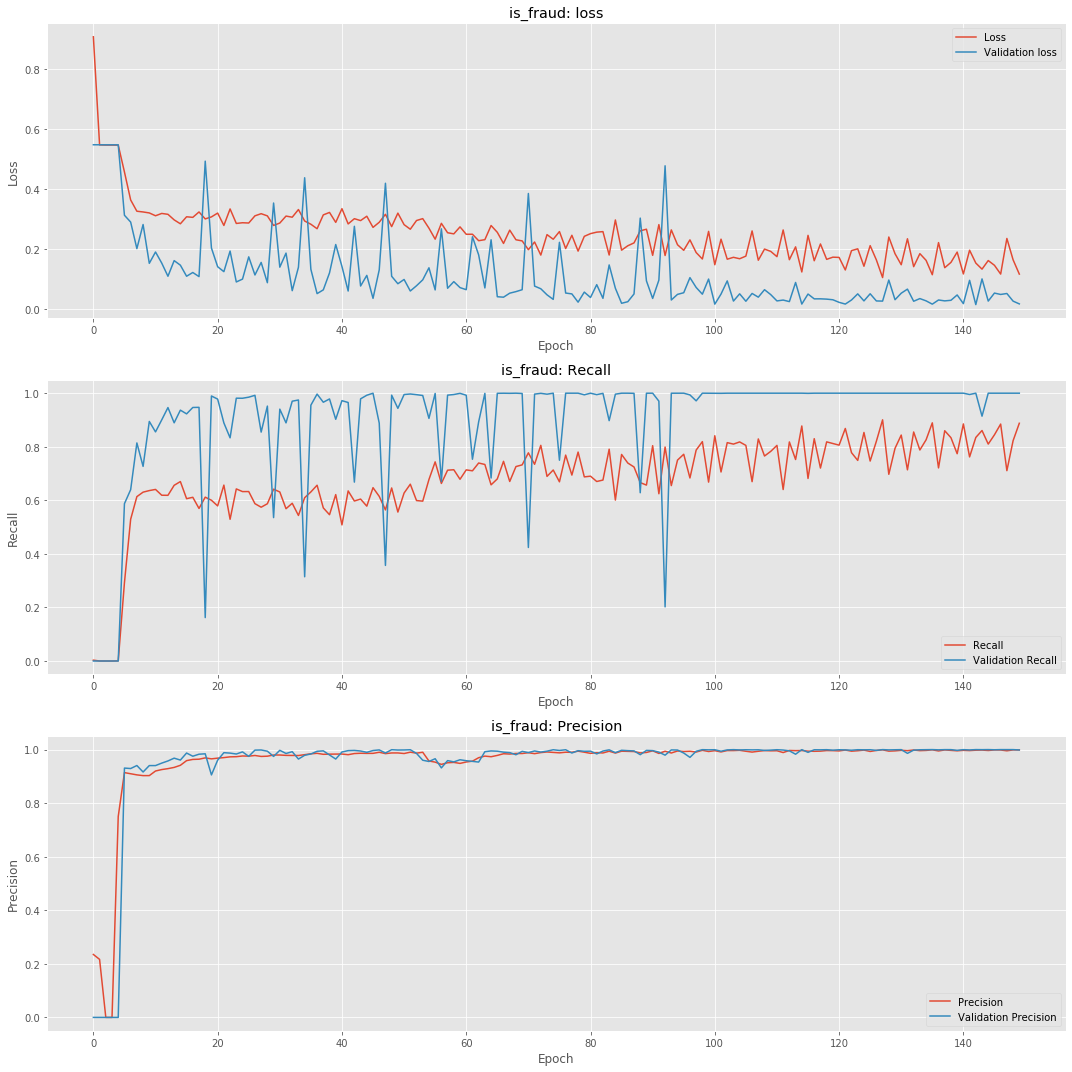

In [15]:
utils.eval_model(history, model, X_test_210, y_test_210, 'is_fraud')

In [16]:
print(classification_report(y_test_210, rounded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209189
           1       0.89      1.00      0.94       811

    accuracy                           1.00    210000
   macro avg       0.94      1.00      0.97    210000
weighted avg       1.00      1.00      1.00    210000



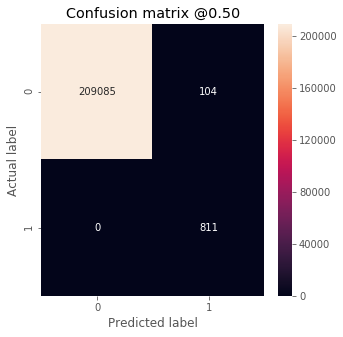

In [17]:
utils.plot_cm(y_test_210, predictions)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Guardar el Modelo
model.save('ANN.h5')

In [20]:
#Alta de Modelo
import keras.models
alta_modelo = keras.models.load_model('ANN.h5', compile=False)
alta_modelo.compile(loss='binary_crossentropy', optimizer=adam, metrics=[keras_metrics.precision(), keras_metrics.recall()])

In [21]:
# calcula las predicciones para 120000 datos
predictions_120 = alta_modelo.predict(X_test_120)
predictions_90 = alta_modelo.predict(X_test_90)
predictions_32 = alta_modelo.predict(X_test_32)

# redondeamos las predicciones
rounded_120 = [round(x[0]) for x in predictions_120]
rounded_90 = [round(x[0]) for x in predictions_90]
rounded_32 = [round(x[0]) for x in predictions_32]

In [22]:
print(classification_report(y_test_120, rounded_120))
print(classification_report(y_test_90, rounded_90))
print(classification_report(y_test_32, rounded_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119545
           1       0.89      1.00      0.94       455

    accuracy                           1.00    120000
   macro avg       0.94      1.00      0.97    120000
weighted avg       1.00      1.00      1.00    120000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89650
           1       0.89      1.00      0.94       350

    accuracy                           1.00     90000
   macro avg       0.95      1.00      0.97     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31887
           1       0.90      1.00      0.95       113

    accuracy                           1.00     32000
   macro avg       0.95      1.00      0.97     32000
weighted avg       1.00      1.00      1.00     32000



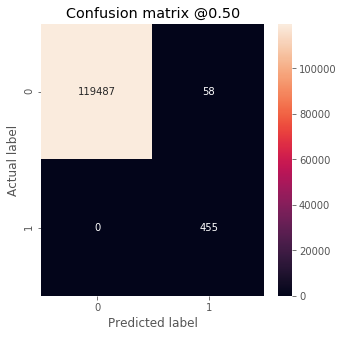

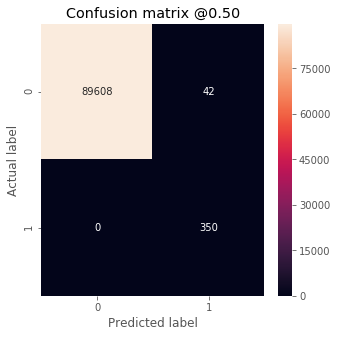

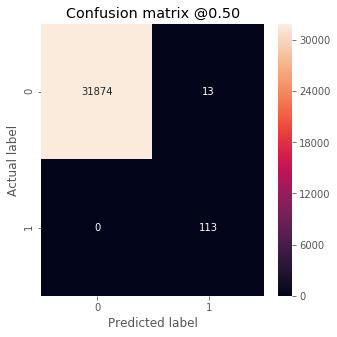

In [23]:
utils.plot_cm(y_test_120, predictions_120)
utils.plot_cm(y_test_90, predictions_90)
utils.plot_cm(y_test_32, predictions_32)